# SPMINER (subgraph matching)

In [ ]:
import sys
sys.path.append("../neural-subgraph-learning-GNN")

In [ ]:
from common import data

In [ ]:
data

In [ ]:
data_source = data.OTFSynDataSource(node_anchored=True)

In [ ]:
data_source

In [ ]:
l = [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21,
        21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23,
        23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26,
        26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27,
        27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
        30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]

In [ ]:
from collections import Counter
Counter(l)

# contare le permutazioni non isomorfe

In [ ]:
em(G[1][0], G[0][2])

In [ ]:
import numpy as np
import itertools
import networkx as nx
import networkx.algorithms.isomorphism as iso

from multiprocessing import SimpleQueue
from multiprocessing.pool import Pool
from multiprocessing import set_start_method
from threading import Lock
from queue import Queue
# custom class wrapping a list in order to make it thread safe
class ThreadSafeList():
    # constructor
    def __init__(self):
        # initialize the list
        self._list = list()
        # initialize the lock
        self._lock = Lock()
 
    # add a value to the list
    def append(self, value):
        # acquire the lock
        with self._lock:
            # append the value
            self._list.append(value)
 
    # remove and return the last value from the list
    def pop(self):
        # acquire the lock
        with self._lock:
            # pop a value from the list
            return self._list.pop()
 
    # read a value from the list at an index
    def get(self, index):
        # acquire the lock
        with self._lock:
            # read a value at the index
            return self._list[index]
    
    def __len__(self):
        return len(self._list)
 
    # return the number of items in the list
    def length(self):
        # acquire the lock
        with self._lock:
            return len(self._list)
    def __iter__(self, *args, **kwargs):
        with self._lock:
            return self._list.__iter__(*args,**kwargs)
    
q = ThreadSafeList()
def get_valid_p(p):
        G = nx.Graph(p)
        for i, e in enumerate(p):
            G.add_edge(*e, rank= i+1)
        isomorph = False
        for H in q:
            if nx.is_isomorphic(G, H, edge_match=em):
                isomorph = True
                break
        if not isomorph:
            q.append(G)

In [1]:
import numpy as np
import itertools
import networkx as nx
import networkx.algorithms.isomorphism as iso

from multiprocessing import SimpleQueue
from multiprocessing.pool import Pool
from multiprocessing import set_start_method
from threading import Lock
from queue import Queue

from time import time

def draw_graph(G, ax=None):
    pos = nx.spring_layout(G)
    nx.draw(
        G, pos, edge_color='black', width=1, linewidths=1,
        node_size=50, node_color='blue', alpha=0.9, ax=ax
        #labels={node: node for node in G.nodes()}
    )
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={(v1,v2):f['rank'] for v1,v2,f in G.edges(data=True)},
        font_color='red', ax=ax, label_pos=0.3
    )
    if ax:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    else:
        plt.axis('off')
        plt.show()
    

def ranked_graph(edge_list):
    G = nx.Graph(edge_list)
    for i, e in enumerate(edge_list):
        G.add_edge(*e, rank= i+1)
    return G
    
def get_valid_p_with_ranking(list_of_perms):
    non_iso = []
    ret = []
    for p in list_of_perms:
        G = ranked_graph(p)
        isomorph = False
        for H in non_iso:
            if nx.is_isomorphic(G, H, edge_match=em):
                isomorph = True
                break
        if not isomorph:
            non_iso.append(G)
            ret.append(p)
    return ret

def get_valid_p_NO_ranking(list_of_perms):
    non_iso = []
    ret = []
    for p in list_of_perms:
        G = ranked_graph(p)
        isomorph = False
        for H in non_iso:
            if nx.is_isomorphic(G, H):
                isomorph = True
                break
        if not isomorph:
            non_iso.append(G)
            ret.append(p)
    return ret

def get_valid_p_old(list_of_perms):
    valid_perms = []
    for p in list_of_perms:
        G = ranked_graph(p)
        if all(not nx.is_isomorphic(G, H, edge_match=em) for H in valid_perms):    
            valid_perms.append(G)
    return valid_perms


### Verifico sequenziale per n = 4

In [56]:
n = 4
graph = nx.complete_graph(n)
print(f"Edges: {graph.edges()}")
permutations = list(itertools.permutations(graph.edges()))

print(f"total permutations: {len(permutations)}")

start = time()
ret = get_valid_p_with_ranking(permutations)
end = time()
print(f"{len(ret)} ... {round(end-start, 2)} s.")

start = time()
ret = get_valid_p_NO_ranking(permutations)
end = time()
print(f"{len(ret)} ... {round(end-start, 2)} s.")

Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
total permutations: 720
30 ... 3.12 s.
1 ... 0.09 s.


In [82]:
n = 5
graph = nx.complete_graph(n)
print(f"Edges: {graph.edges()}")

permutations = list(itertools.permutations(graph.edges()))
print(f"total permutations: {len(permutations)}")

Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
total permutations: 3628800


In [2]:
3628800/10000

362.88

In [ ]:
if __name__ == '__main__':
    n = 5
    graph = nx.complete_graph(n)
    print(f"Edges: {graph.edges()}")

    permutations = list(itertools.permutations(graph.edges()))
    print(f"total permutations: {len(permutations)}")

    em = iso.numerical_edge_match("rank", 1)
    divisions = 10000
    while divisions >= 1:
        print(divisions)
        subarrays = []
        for i in range(divisions):
            each_perm = len(permutations)//divisions
            subarrays.append(permutations[i*each_perm:(i+1)*each_perm])
        print(f" len subarrays: {len(subarrays[0])}\n")
        #get_valid_p(subarrays[0])
        with Pool(processes=32) as pool:
            resn = pool.map(get_valid_p_with_ranking,subarrays)
        flat_list = [item for sublist in resn for item in sublist]
        #print(f"shape resn: {np.array(flat_list).shape}")
        
        permutations = []
        i = 0
        while i < len(flat_list)-1:
            permutations.append(flat_list[i])
            permutations.append(flat_list[i+1])
            i = i + 2
        if len(flat_list)%2 != 0:
            permutations.append(flat_list[len(flat_list)-1])
        #print(f"len permutations: {len(permutations)}")
        
        divisions = divisions // 2
        
    print(f"\n Ci sono {len(permutations)} permutazioni uniche")
    #print(permutations)

total permutations: 3628800

10000
 len subarrays: 362

5000
 len subarrays: 717

2500
 len subarrays: 1414

1250
 len subarrays: 2741

625
 len subarrays: 5232

312
 len subarrays: 9686

In [5]:
len(permutations), 312*9686

(3022135, 3022032)

In [8]:
import pickle
with open('non_iso_permutations_5nodes.pkl', 'wb') as f:
    pickle.dump(permutations, f)

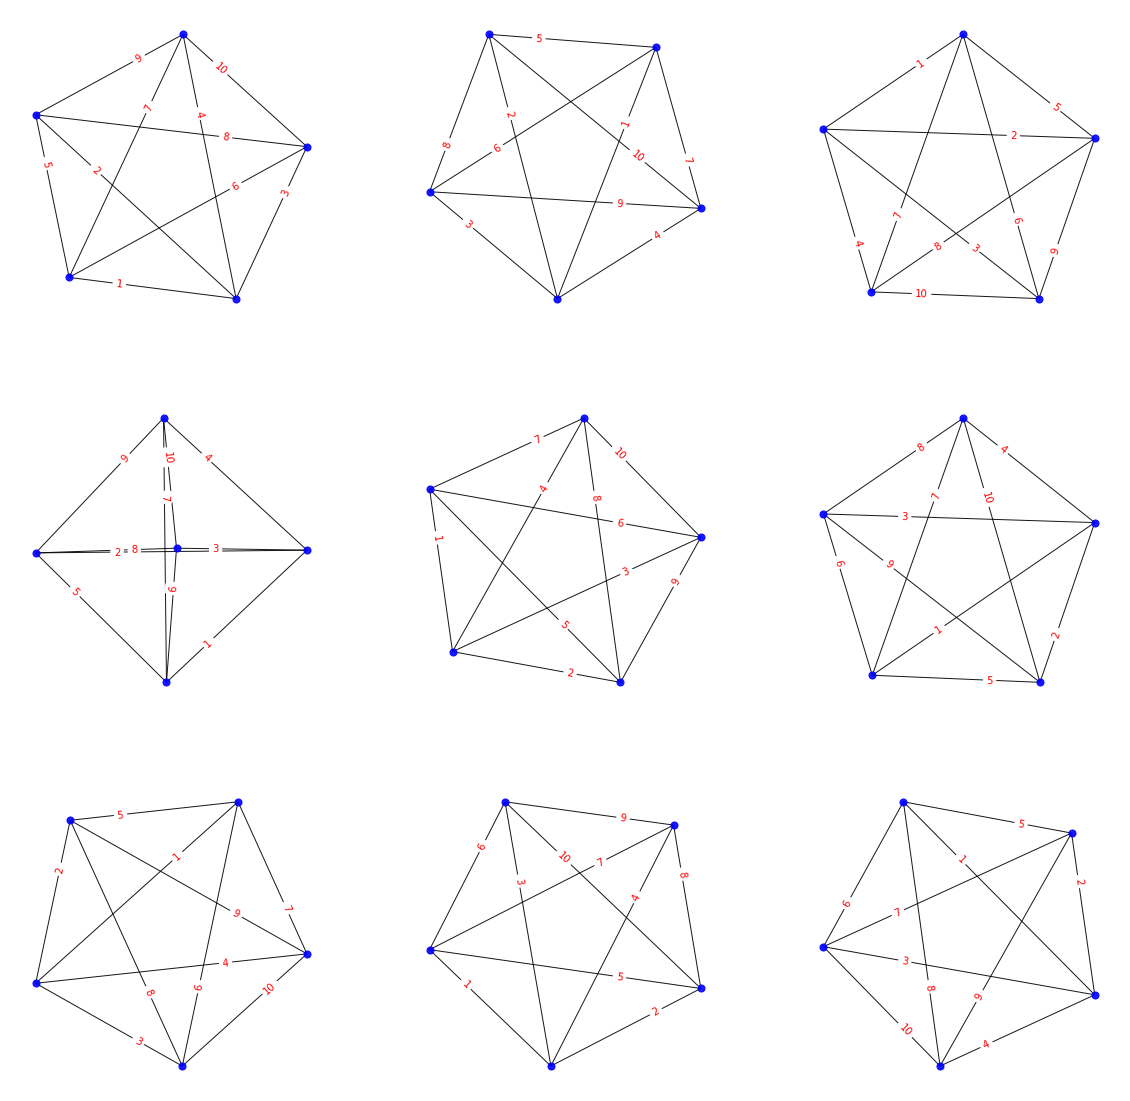

In [7]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(3, 3, figsize=(20,20))
for i in range(3):
    for j in range(3):
        p = permutations[i*j+j]
        G = ranked_graph(p)
        draw_graph(G, axs[i][j])

### Le 30 realizzazioni non isomorfe di grafi con 4 nodi e edges ordinate con numeri interi

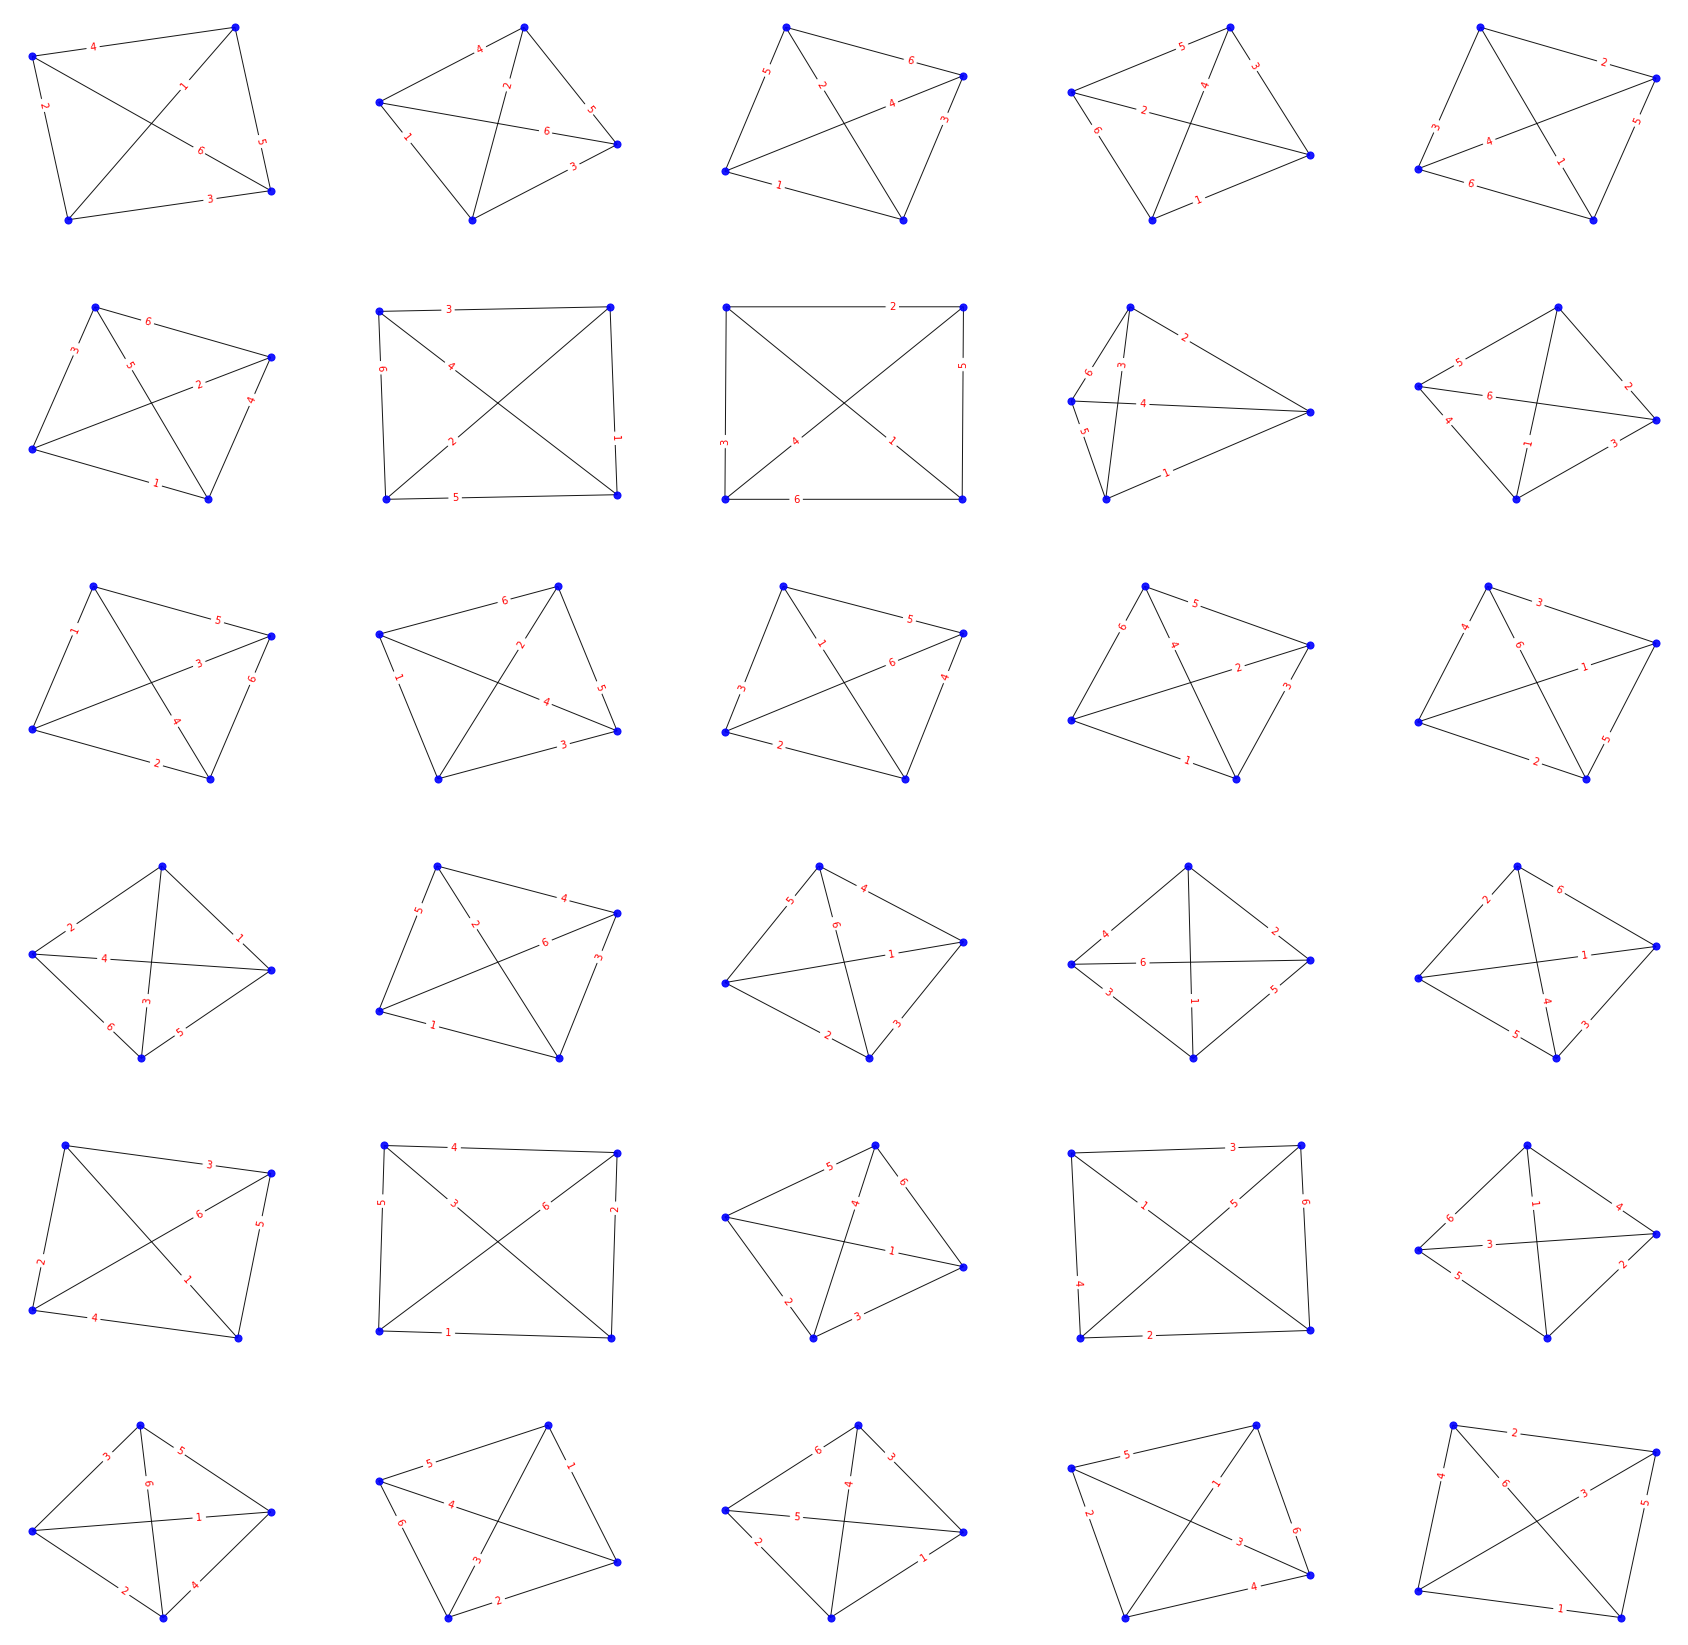

In [80]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(6, 5, figsize=(30,30))
for i in range(6):
    for j in range(5):
        p = permutations[i*j+j]
        G = ranked_graph(p)
        draw_graph(G, axs[i][j])